In [35]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

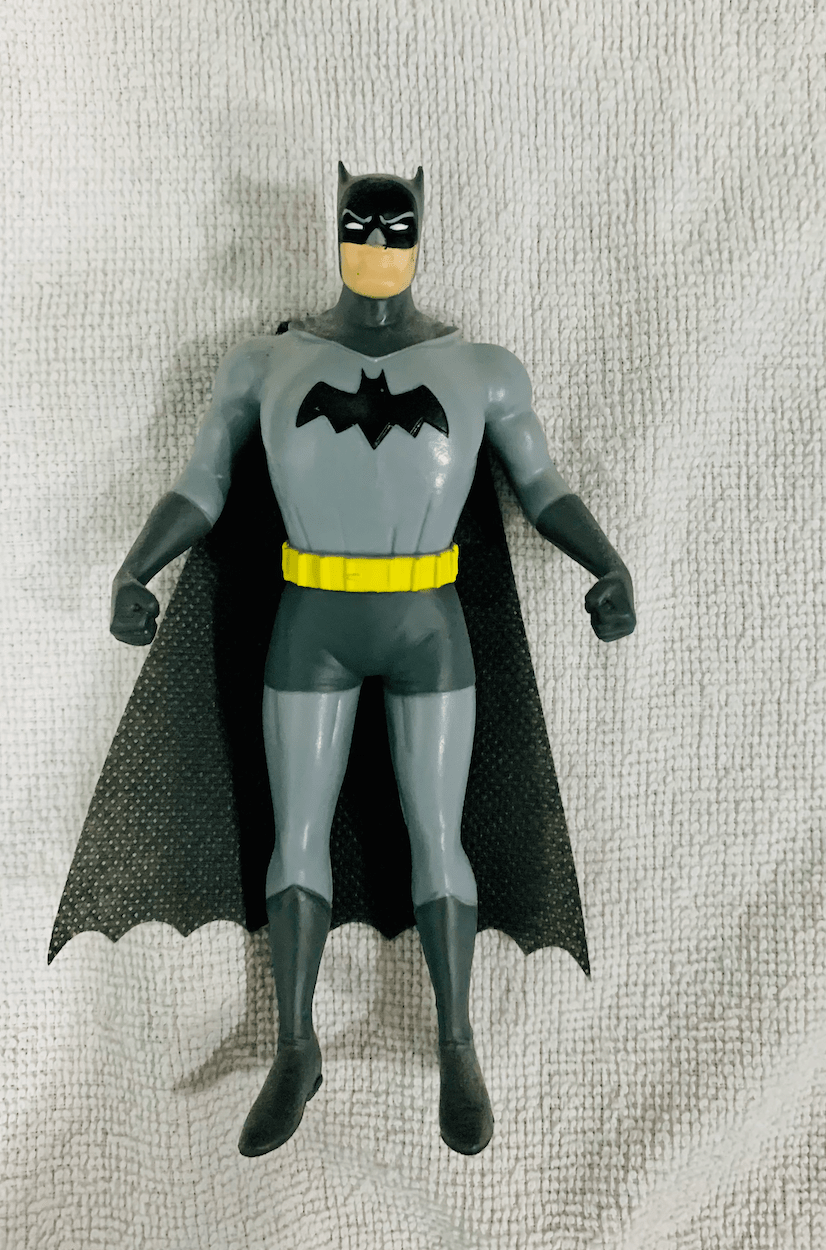

In [36]:
image = cv.imread('/content/drive/My Drive/Dataset/Images/1-min.png')

image_orig = image.copy()

cv2_imshow(image)

In [ ]:
# print('Original Dimensions : ',image_orig.shape)
 
# scale_percent = 40 # percent of original size
# width = int(image_orig.shape[1] * scale_percent / 100)
# height = int(image_orig.shape[0] * scale_percent / 100)
# dim = (width, height)
# # resize image
# resized = cv.resize(image_orig, dim, interpolation = cv.INTER_AREA)
 
# print('Resized Dimensions : ',resized.shape)
 
# cv2_imshow(resized)

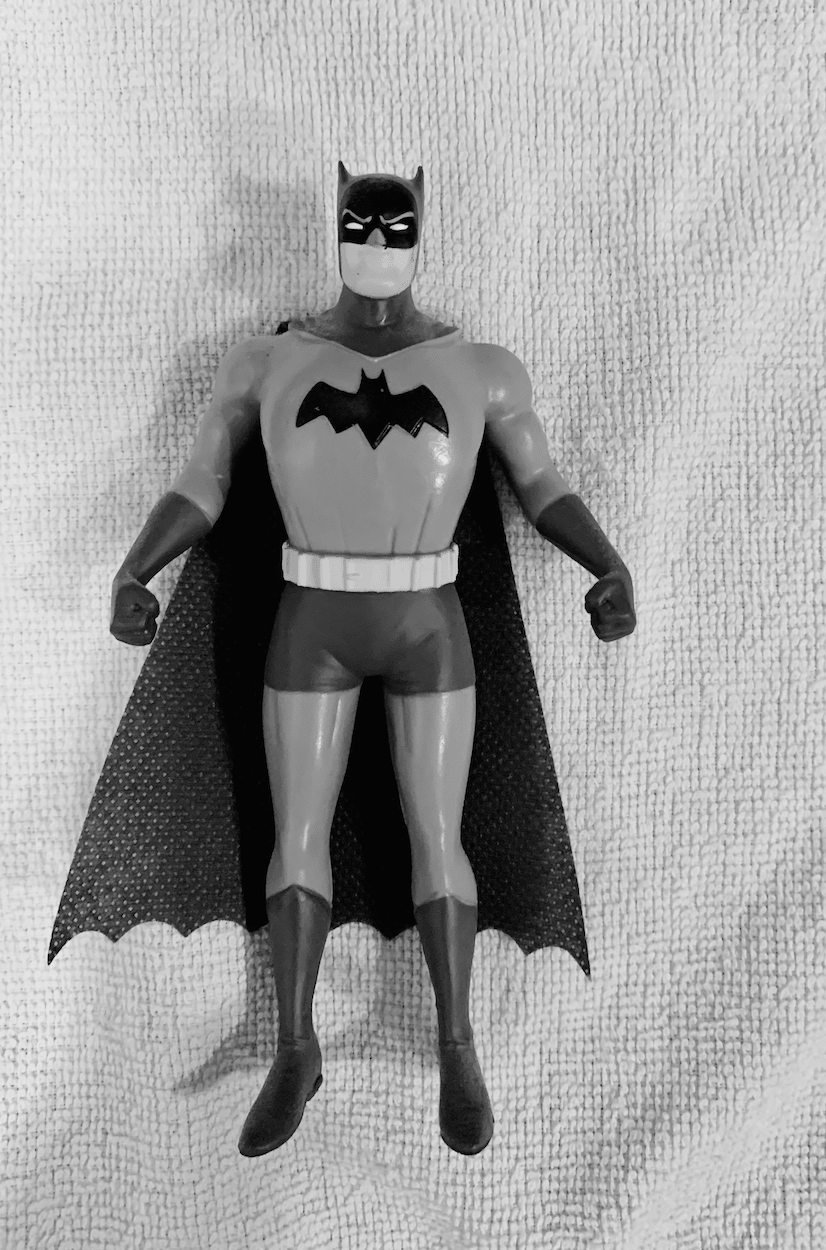

In [37]:
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image)
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# cv2_imshow(image)

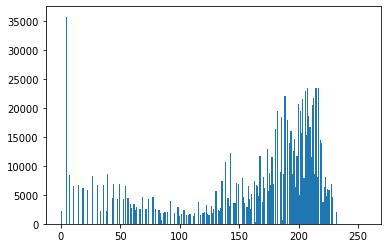

In [38]:
plt.hist(image.flatten(), 256, [0,256])
plt.show()

127.0


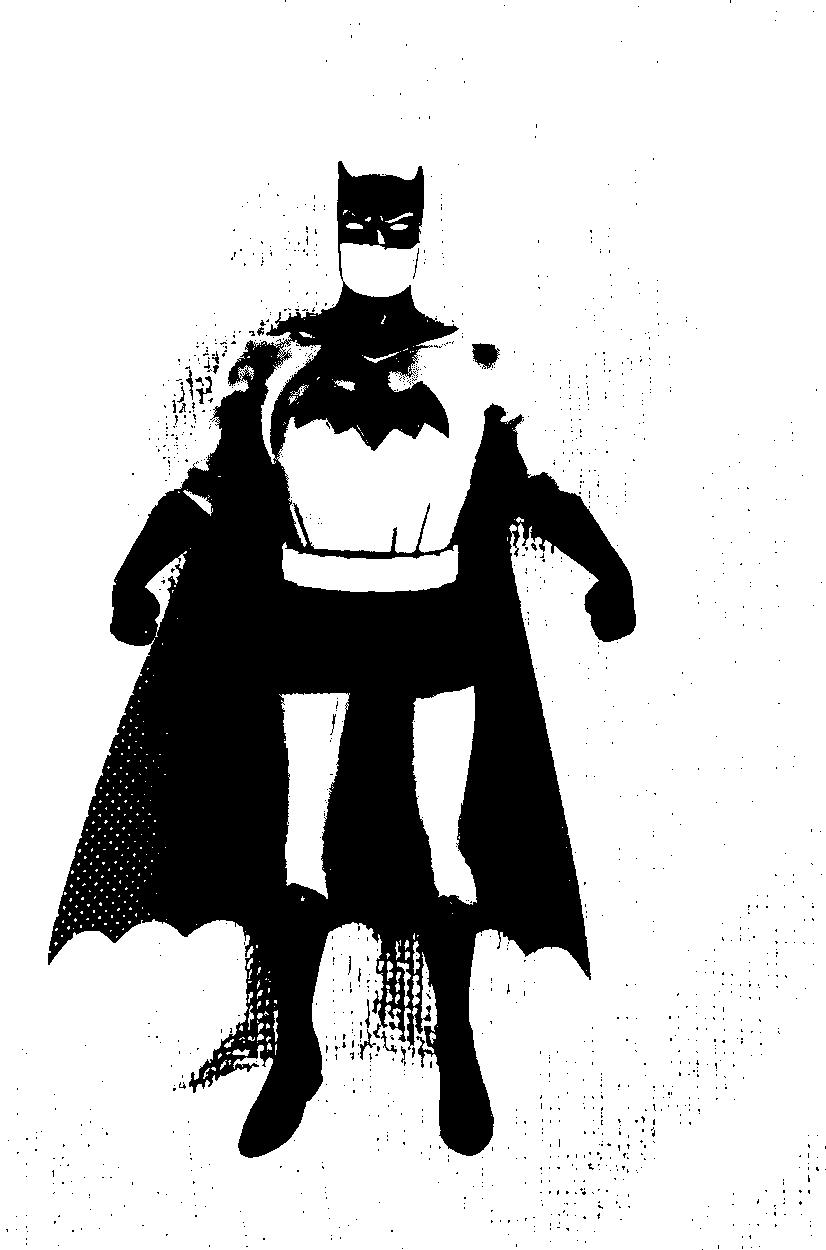

In [40]:
thresholding_value, thresholding_result = cv.threshold(image, 127, 255, cv.THRESH_BINARY)

print(thresholding_value)

cv2_imshow(thresholding_result)

In [41]:
thresholding_result = cv.bitwise_not(thresholding_result)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(contours)

[array([[[ 702, 1249]]], dtype=int32), array([[[ 402, 1248]]], dtype=int32), array([[[ 751, 1247]]], dtype=int32), array([[[ 759, 1246]]], dtype=int32), array([[[ 742, 1246]],

       [[ 742, 1248]]], dtype=int32), array([[[ 246, 1246]],

       [[ 247, 1246]]], dtype=int32), array([[[ 718, 1245]],

       [[ 718, 1248]]], dtype=int32), array([[[ 209, 1245]],

       [[ 209, 1246]]], dtype=int32), array([[[  58, 1245]]], dtype=int32), array([[[ 516, 1244]],

       [[ 516, 1246]]], dtype=int32), array([[[  26, 1243]],

       [[  26, 1244]]], dtype=int32), array([[[ 585, 1241]],

       [[ 585, 1242]]], dtype=int32), array([[[ 550, 1241]]], dtype=int32), array([[[ 577, 1240]]], dtype=int32), array([[[ 331, 1238]],

       [[ 331, 1239]]], dtype=int32), array([[[ 263, 1238]],

       [[ 263, 1239]],

       [[ 264, 1239]],

       [[ 264, 1238]]], dtype=int32), array([[[  26, 1238]],

       [[  26, 1239]]], dtype=int32), array([[[ 340, 1237]],

       [[ 340, 1238]]], dtype=int32), arr

In [42]:
len(contours)

1277

In [43]:
contours[0]

array([[[ 702, 1249]]], dtype=int32)

In [44]:
#FeatureExtraxtion Contours
area = cv.contourArea(contours[0])

area

0.0

In [45]:
x, y, w, h = cv.boundingRect(contours[0])

print(x, y, w, h)

702 1249 1 1


In [46]:
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)

  print("Contour #" + str(index), x, y, w, h, area)


Contour #0 702 1249 1 1 0.0
Contour #1 402 1248 1 1 0.0
Contour #2 751 1247 1 1 0.0
Contour #3 759 1246 1 1 0.0
Contour #4 742 1246 1 3 0.0
Contour #5 246 1246 2 1 0.0
Contour #6 718 1245 1 4 0.0
Contour #7 209 1245 1 2 0.0
Contour #8 58 1245 1 1 0.0
Contour #9 516 1244 1 3 0.0
Contour #10 26 1243 1 2 0.0
Contour #11 585 1241 1 2 0.0
Contour #12 550 1241 1 1 0.0
Contour #13 577 1240 1 1 0.0
Contour #14 331 1238 1 2 0.0
Contour #15 263 1238 2 2 1.0
Contour #16 26 1238 1 2 0.0
Contour #17 340 1237 1 2 0.0
Contour #18 742 1236 1 2 0.0
Contour #19 811 1235 1 1 0.0
Contour #20 749 1235 2 4 1.0
Contour #21 331 1235 1 1 0.0
Contour #22 245 1235 2 1 0.0
Contour #23 508 1234 1 1 0.0
Contour #24 166 1234 2 2 0.5
Contour #25 594 1231 1 1 0.0
Contour #26 534 1231 1 1 0.0
Contour #27 27 1231 1 1 0.0
Contour #28 577 1230 1 1 0.0
Contour #29 391 1230 2 2 1.0
Contour #30 72 1230 2 2 1.0
Contour #31 16 1229 1 1 0.0
Contour #32 6 1229 2 3 0.5
Contour #33 700 1228 1 1 0.0
Contour #34 566 1228 3 3 2.0
Con

Object-1


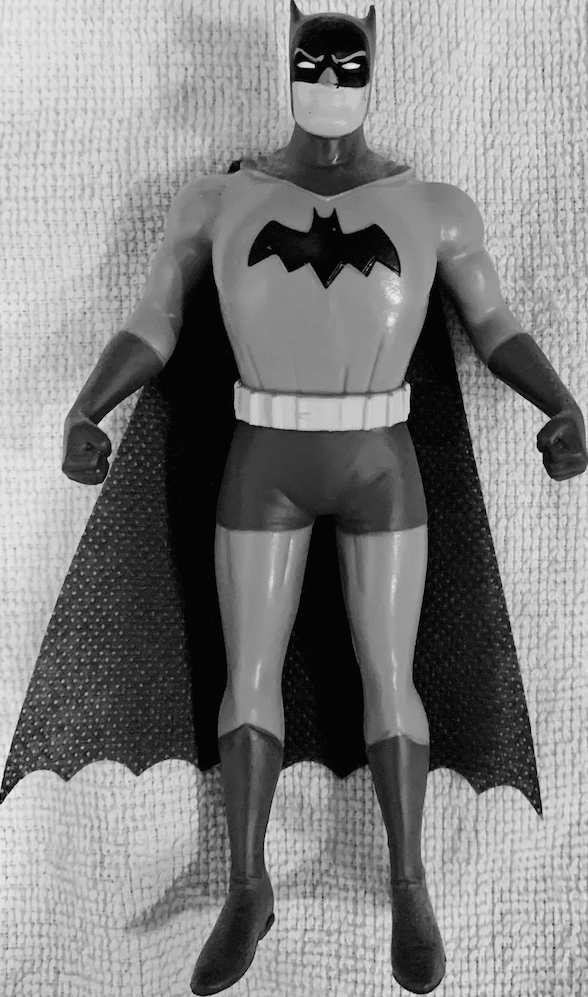

In [48]:
x, y, w, h = cv.boundingRect(contours[1250])

batman = image[y:y+h, x:x+w]



print('Object-1')
cv2_imshow(batman)


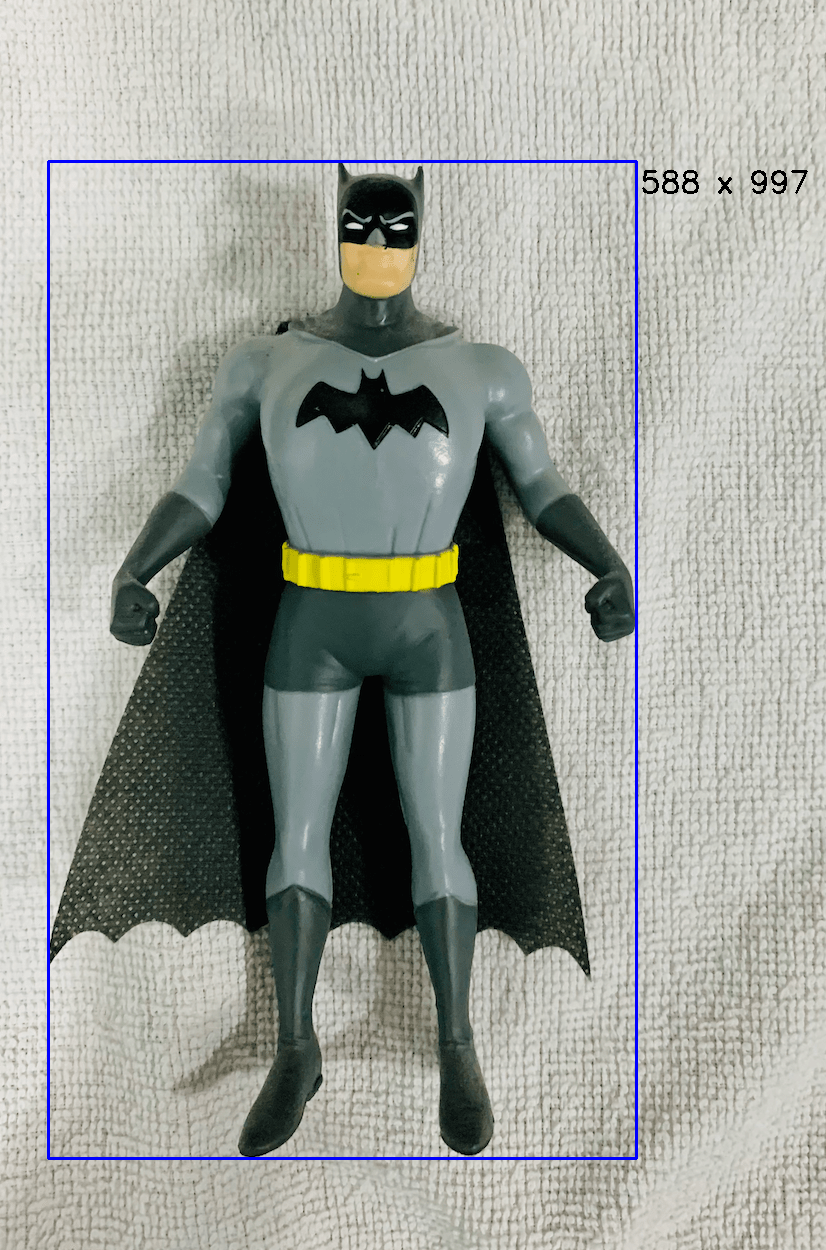

In [52]:
cv.rectangle(image_orig, (x,y), (x+w,y+h), (255,0,0), 2)
font = cv.FONT_HERSHEY_SIMPLEX
bottomRightCornerOfText = (640,192)
fontScale = 1
fontColor = (0,0,0)
lineType = 2
text = str(w) + ' x ' + str(h)
cv.putText(image_orig, text, bottomRightCornerOfText, font, fontScale, fontColor, lineType)
cv2_imshow(image_orig)

Proses preprosesing sebelum ekstraksi contour : Gambar diubah menjadi abu-abu menggunakan grayscale. Kemudian dilakukan global thresholding pada gambar yang telah di grayscale agar gambar berwarna hitam putih sehingga mudah melihat mana yang background mana yang objek. Dikarenakan background berwarna putih, maka diperlukan fungsi bitwise karena program membaca background hanya berwarna hitam. Dari hasil thresholding didapatkan contournya.

